#  Decision Tree 
##### Author- Rohan Kulkarni

### Visualizing Decision Tree of IRIS dataset for Better understanding.

In [2]:
import pandas as pd
import numpy as np

In [3]:
iris=pd.read_csv(r'E:\Imarticus\The Spark Foundation\Iris.csv')

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris=iris.drop(columns=['Id'])

In [6]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
iris.Species=iris.Species.replace({'Iris-virginica':1,'Iris-versicolor':2,'Iris-setosa':3})

In [8]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,3
1,4.9,3.0,1.4,0.2,3
2,4.7,3.2,1.3,0.2,3
3,4.6,3.1,1.5,0.2,3
4,5.0,3.6,1.4,0.2,3
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


#### Train-test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
iris_train,iris_test = train_test_split(iris,test_size=.2,random_state=10)

In [11]:
iris_train_X=iris_train.iloc[:,:-1]
iris_train_y=iris_train.iloc[:,-1]

In [12]:
iris_test_X=iris_test.iloc[:,:-1]
iris_test_y=iris_test.iloc[:,-1]

## Model Building

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=4,class_weight='balanced')

In [16]:
dt.fit(iris_train_X,iris_train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=4)

In [17]:
Predict=dt.predict(iris_test_X)

##### As we can see, Decision Tree has been built.

#### Metrics

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

In [45]:
C=confusion_matrix(Predict,iris_test_y)


In [44]:
Accuracy=accuracy_score(iris_test_y,Predict)

In [47]:
print('Confusion Matrix:\n\n',C,'\n','\nAccuracy:\t',Accuracy*100)

Confusion Matrix:

 [[ 7  0  0]
 [ 0 13  0]
 [ 0  0 10]] 
 
Accuracy:	 100.0


In [48]:
dt.feature_importances_

array([0.        , 0.01761465, 0.40679057, 0.57559478])

In [49]:
feature_importance=pd.DataFrame({'Columns':iris_train_X.columns,'Feature Importance':dt.feature_importances_})

In [50]:
feature_importance

,Columns,Feature Importance
0,SepalLengthCm,0.000000
1,SepalWidthCm,0.017615
2,PetalLengthCm,0.406791
3,PetalWidthCm,0.575595


## Visualizing a Tree

In [51]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [52]:
# If your system dosen't have these libraries, Install pydotplus & pydot! 

#!pip install pydotplus
#!pip install pydot

from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from six import StringIO


In [53]:
iris_train_X_names = iris_train_X.columns

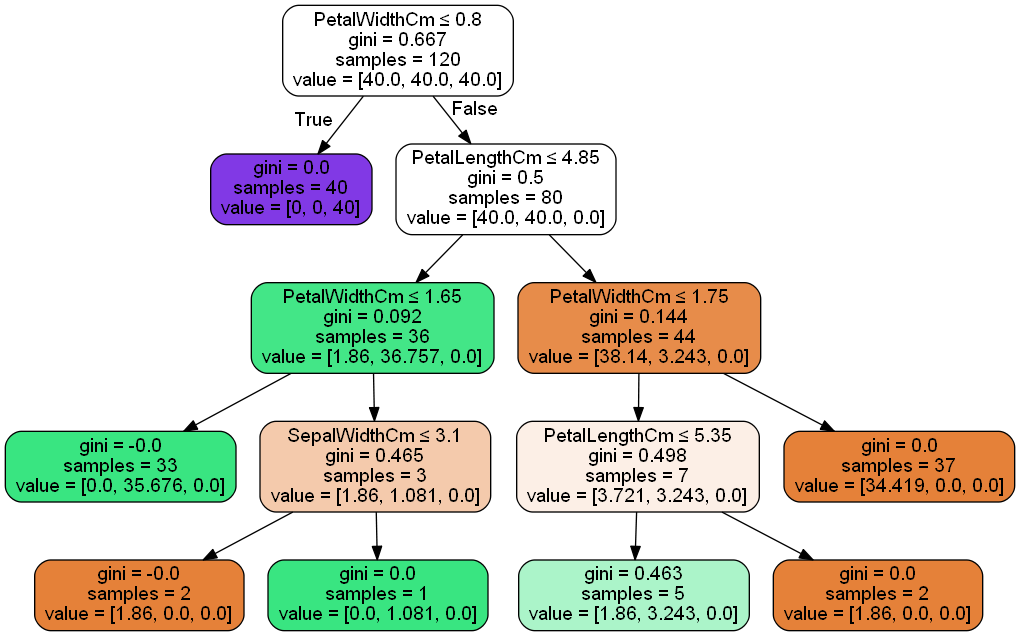

<Figure size 1008x1008 with 0 Axes>

In [54]:
dot_data = StringIO() ## creating a empty file
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(14,14))

export_graphviz(dt, out_file=dot_data,
filled=True, rounded=True,
special_characters=True , feature_names=iris_train_X_names )

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Decision Tree for IRIS.